In [81]:
import numpy as np
import os
import matplotlib.pyplot as plt
import pandas as pd
import re

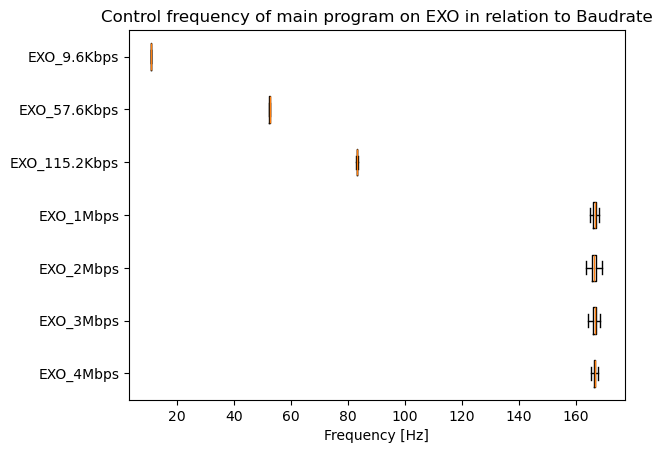

In [82]:
data = []
names = []
meanprops = {"marker": "o", "markersize": 5}
folder = r"C:\Users\anjaz\OneDrive\Desktop\JAKA\Eduexo_PC\analysis\jupyter\EXO_frequency_test"

def baudrate_key(name):
    match = re.search(r'_(\d+(?:\.\d+)?)([KM]bps|bps)', name)
    if match:
        num, unit = match.groups()
        num = float(num)
        return num * {'bps': 1, 'Kbps': 1_000, 'Mbps': 1_000_000}[unit]
    return 0

filenames = sorted(
    [f for f in os.listdir(folder) if f.startswith("frequency_data") and f.endswith(".txt")],
    key=baudrate_key,
    reverse=True
)

for filename in filenames:
    with open(os.path.join(folder, filename), "r") as file:
        a = [float(line.strip()) for line in file]
    data.append(a)
    suffix = filename[len("frequency_data_"):-len(".txt")]
    names.append(suffix)

plt.boxplot(data, vert=False, tick_labels=names, manage_ticks=True, showfliers=False)
plt.title('Control frequency of main program on EXO in relation to Baudrate')
plt.xlabel("Frequency [Hz]")
plt.show()


100Hz Loop: 0.62% outliers (Z-score method)


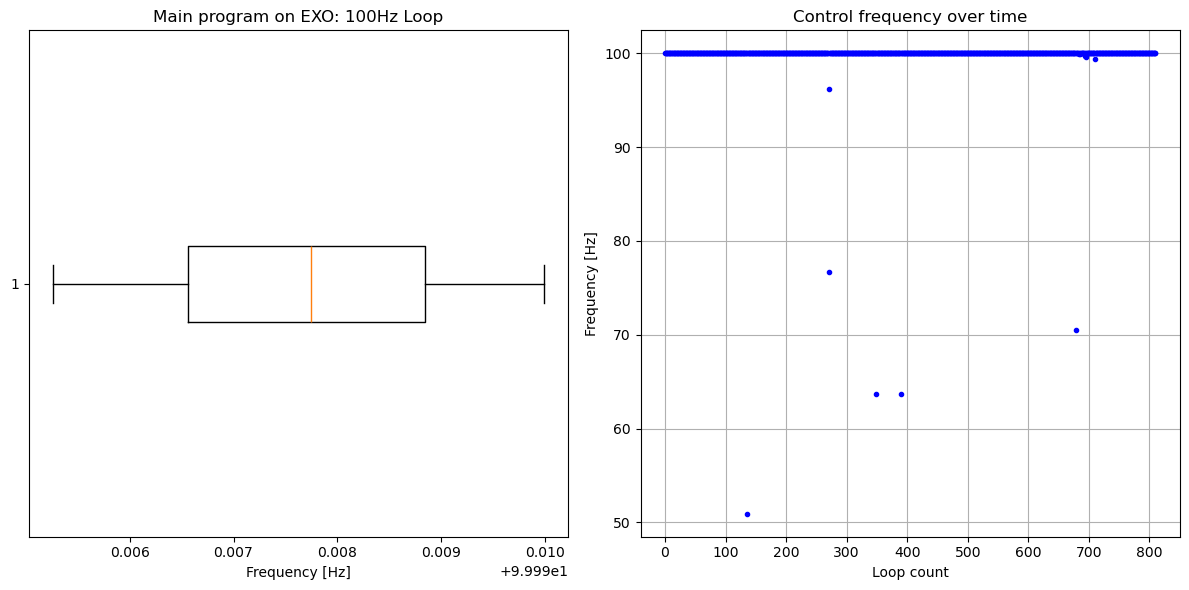

140Hz Loop: 0.94% outliers (Z-score method)


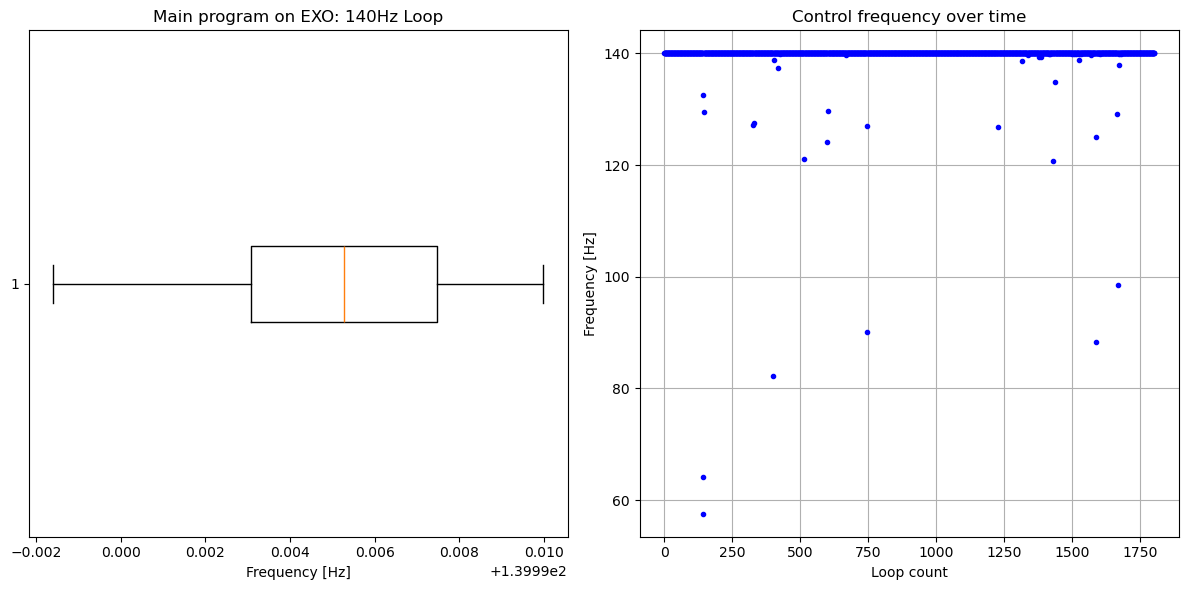

150Hz Loop: 1.14% outliers (Z-score method)


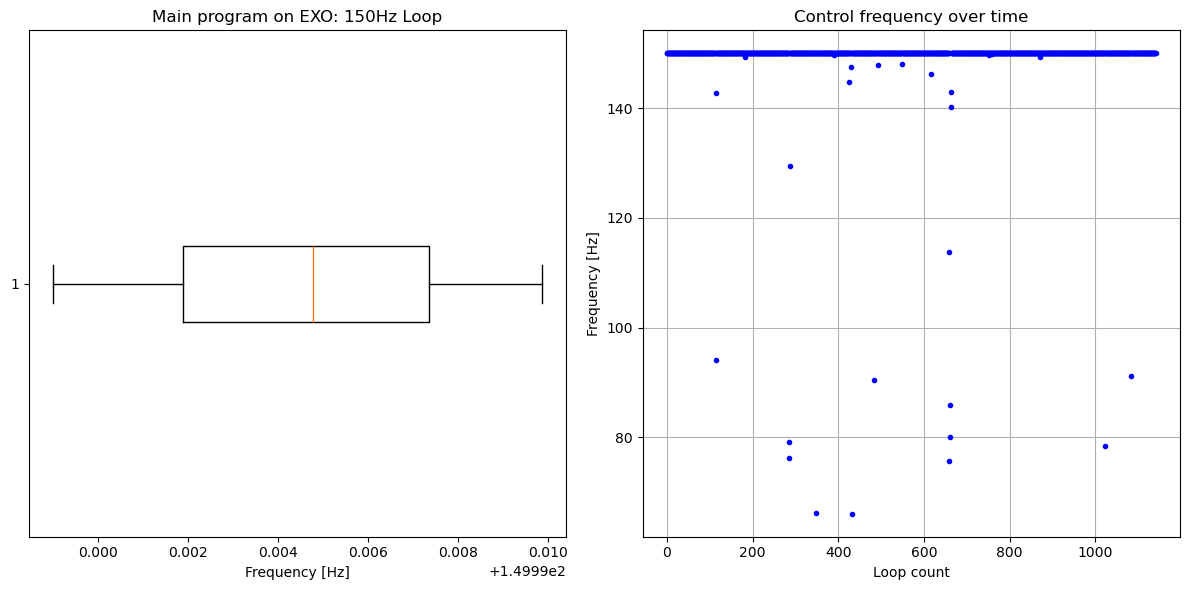

200Hz Loop: 3.30% outliers (Z-score method)


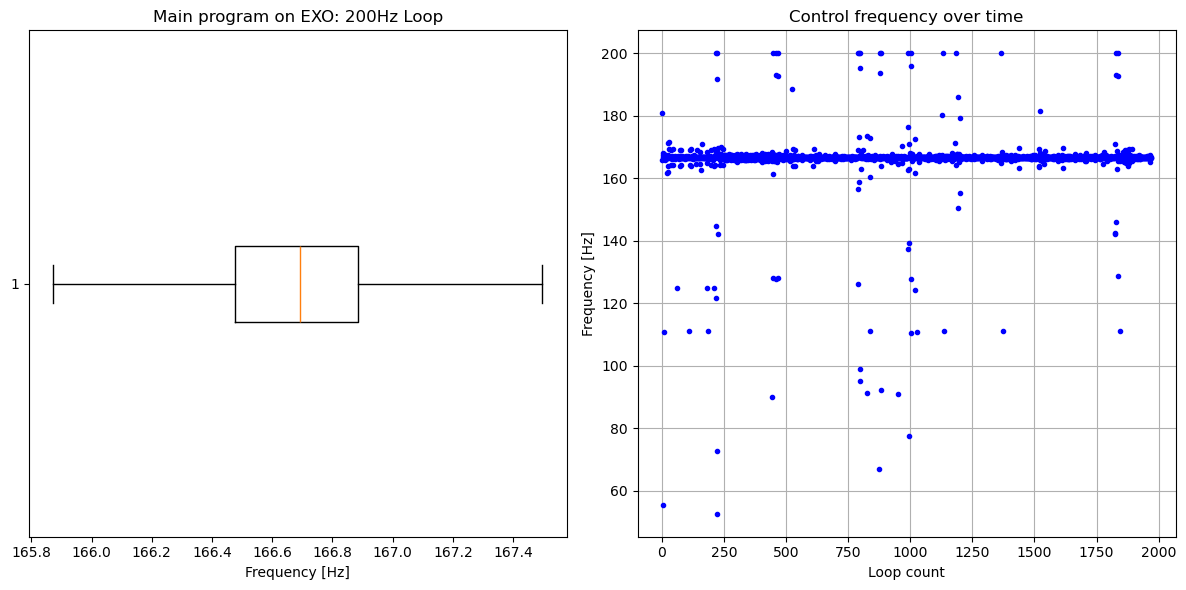

300Hz Loop: 4.80% outliers (Z-score method)


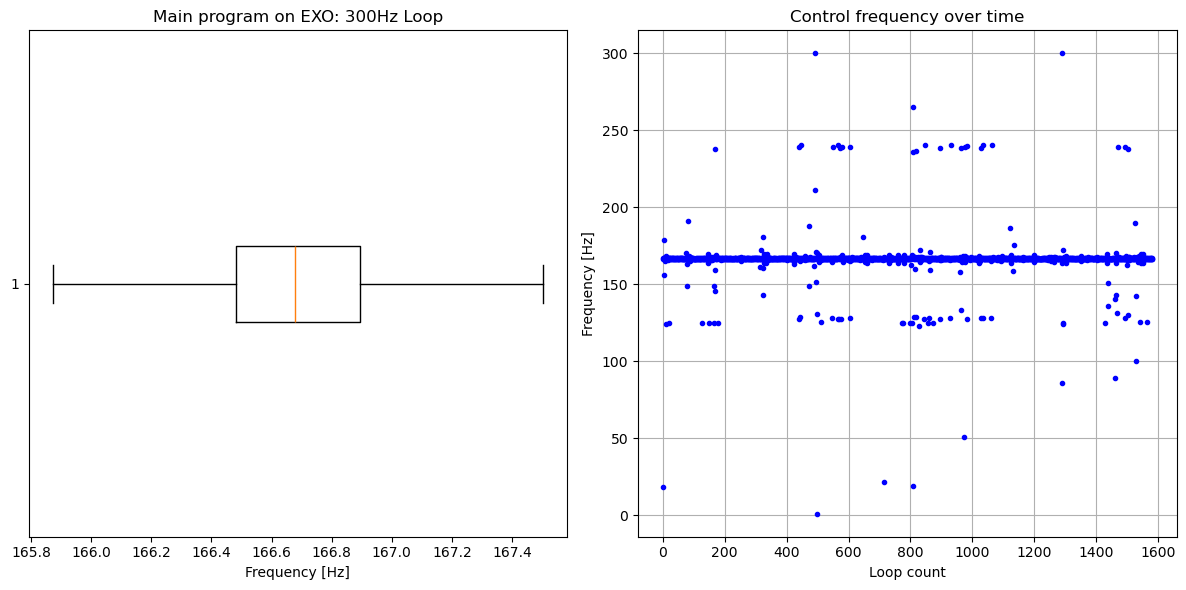

Velocity Calculated: 4.86% outliers (Z-score method)


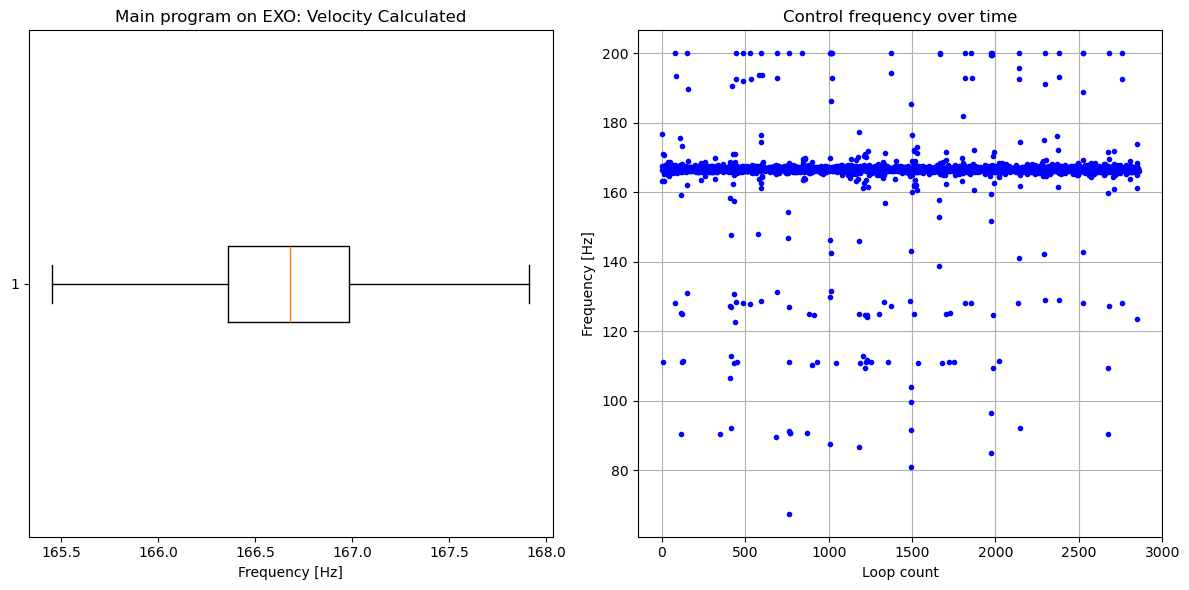

Velocity Read: 2.36% outliers (Z-score method)


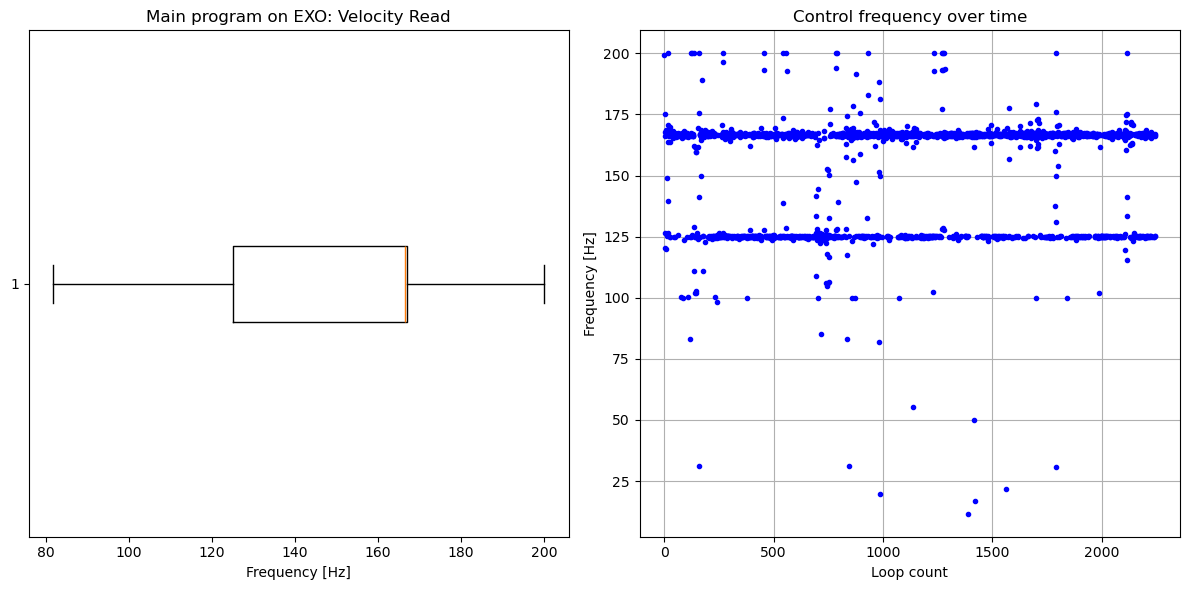

In [83]:
meanprops = {
    "marker": "o",
    "markersize": 5,
}

for filename in os.listdir(os.path.join(r"C:\Users\anjaz\OneDrive\Desktop\JAKA\Eduexo_PC\analysis\jupyter\EXO_frequency_test")):
    if filename.startswith("EXO"):
        with open(os.path.join(r"C:\Users\anjaz\OneDrive\Desktop\JAKA\Eduexo_PC\analysis\jupyter\EXO_frequency_test", filename), "r") as file:
            a = [float(line.strip()) for line in file]


        # Convert to numpy array
        data = np.array(a)

        # Calculate mean and standard deviation
        mean = np.mean(data)
        std = np.std(data)

        # Identify outliers: values more than 2 std from mean
        z_scores = (data - mean) / std
        outliers = data[np.abs(z_scores) > 2]
        outlier_percent = len(outliers) / len(data) * 100

        clean_name = filename.replace("EXO_", "").replace(".txt", "").replace("_", " ").title()
        print(f"{clean_name}: {outlier_percent:.2f}% outliers (Z-score method)")

        # Create a figure with two subplots
        fig, axes = plt.subplots(1, 2, figsize=(12, 6))  # 1 row, 2 columns

        # First boxplot (without fliers)
        axes[0].boxplot(a, vert=False, manage_ticks=True, showfliers=False)
        axes[0].set_title(f"Main program on EXO: {clean_name}")
        axes[0].set_xlabel("Frequency [Hz]")

        # Second boxplot (with fliers)
        axes[1].plot(data, label='control frequency', color='blue', marker=".", linestyle="None")
        axes[1].set_title(f'Control frequency over time')
        axes[1].set_ylabel("Frequency [Hz]")
        axes[1].set_xlabel("Loop count")
        axes[1].grid(True)

        # Display the plots
        plt.tight_layout()
        plt.show()

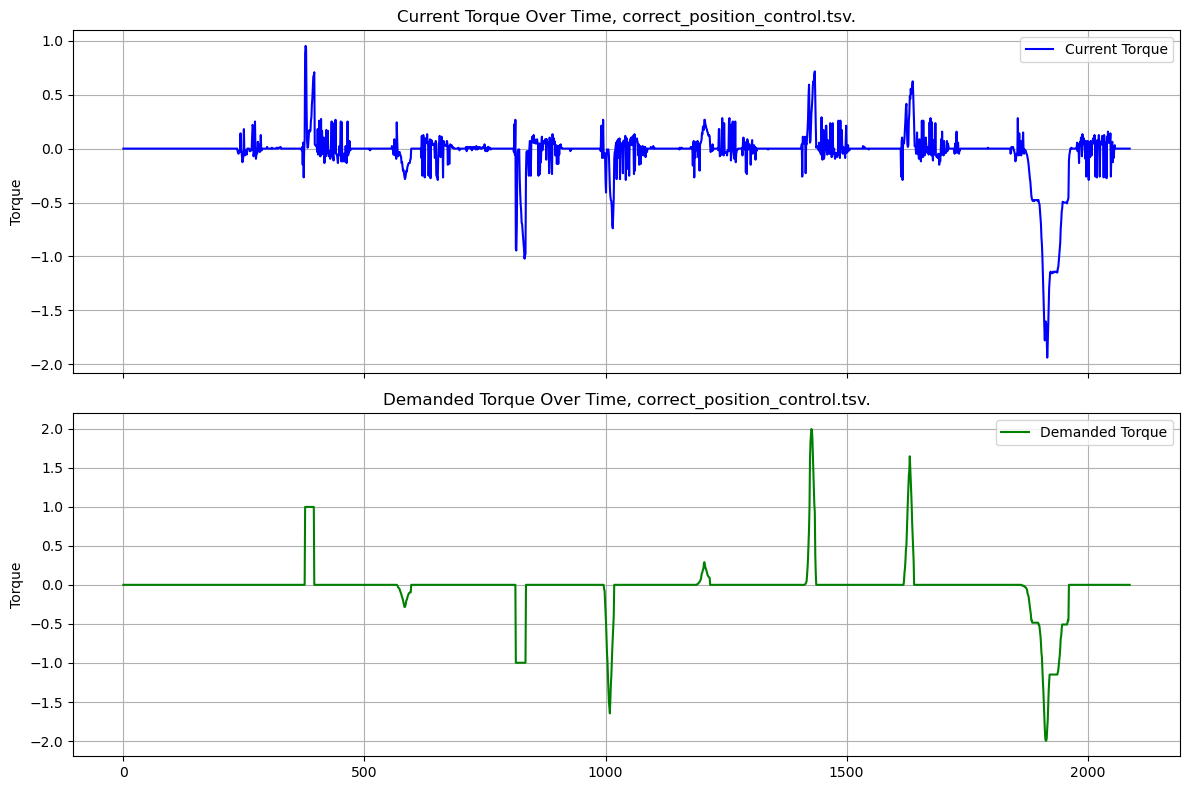

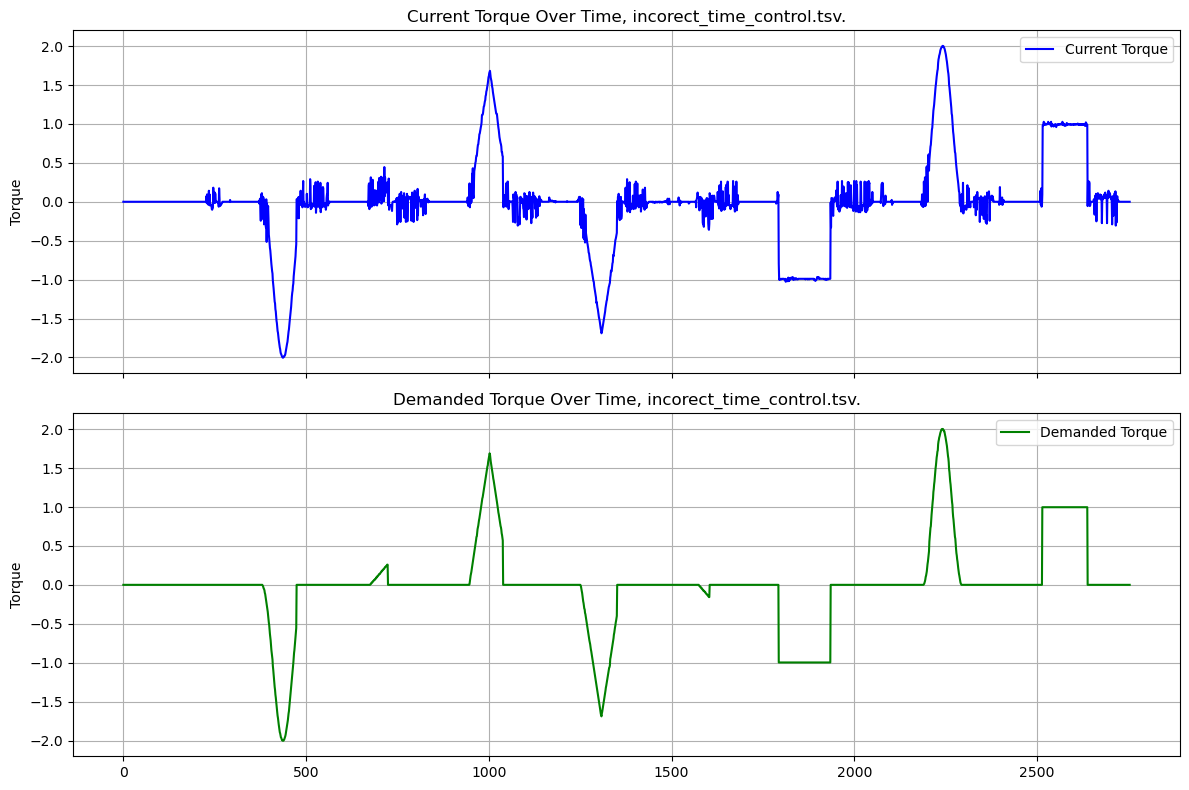

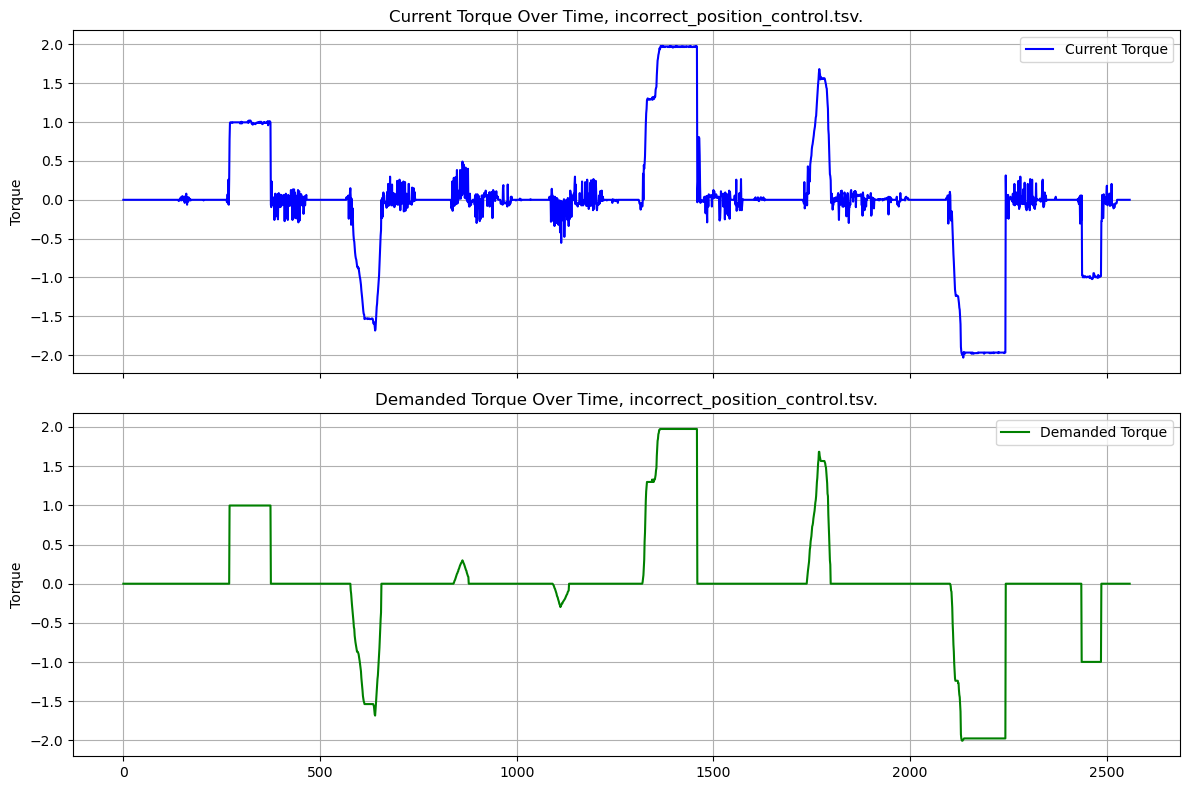

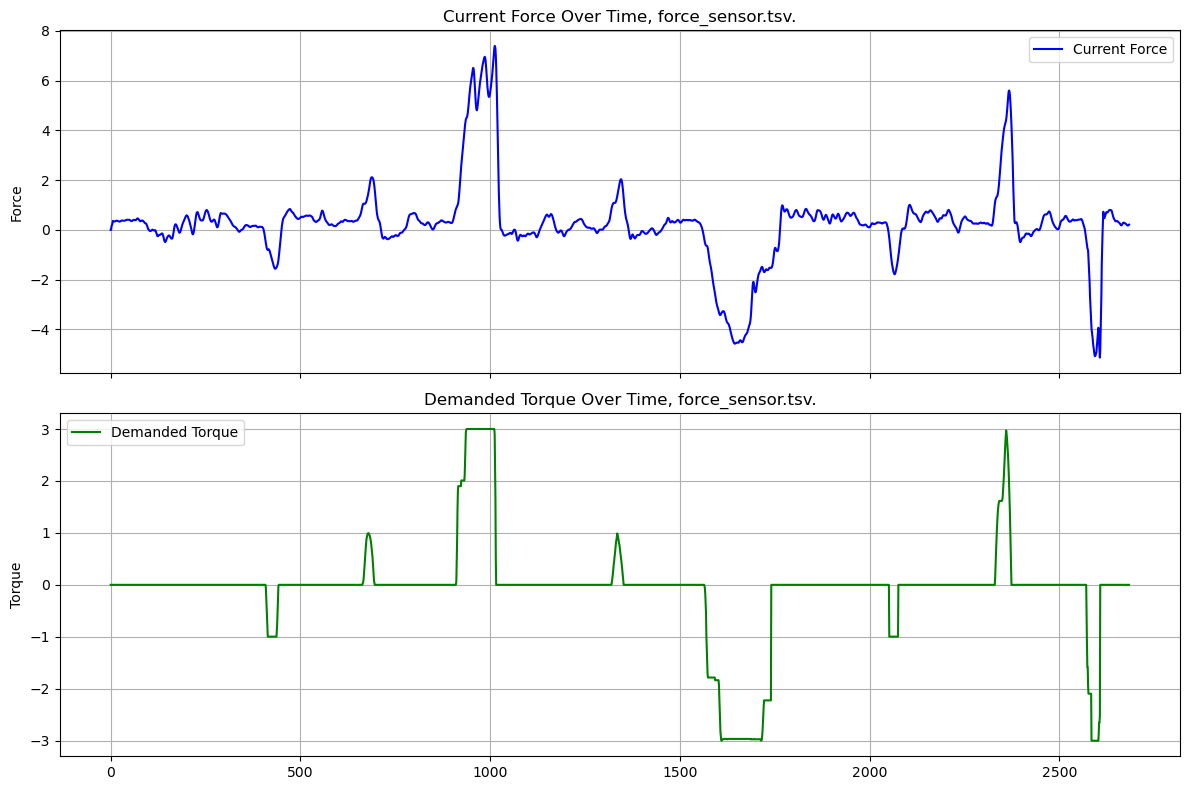

In [84]:
for filename in os.listdir(os.path.join(r"C:\Users\anjaz\OneDrive\Desktop\JAKA\Eduexo_PC\analysis\jupyter\PC_torque_test")):
    if not filename.startswith("force"):
        # Load data
        df = pd.read_csv(os.path.join(r"C:\Users\anjaz\OneDrive\Desktop\JAKA\Eduexo_PC\analysis\jupyter\PC_torque_test", filename), sep="\t")

        # Create a figure with two subplots
        fig, axs = plt.subplots(2, 1, figsize=(12, 8), sharex=True)

        # Plot Current Torque
        axs[0].plot(df['current_torque'], label='Current Torque', color='blue')
        axs[0].set_ylabel('Torque')
        axs[0].set_title(f'Current Torque Over Time, {filename}.')
        axs[0].grid(True)
        axs[0].legend()

        # Plot Demanded Torque
        axs[1].plot(df['demanded_torque'], label='Demanded Torque', color='green')
        axs[1].set_ylabel('Torque')
        axs[1].set_title(f'Demanded Torque Over Time, {filename}.')
        axs[1].grid(True)
        axs[1].legend()

        plt.tight_layout()
        plt.show()

for filename in os.listdir(os.path.join(r"C:\Users\anjaz\OneDrive\Desktop\JAKA\Eduexo_PC\analysis\jupyter\PC_torque_test")):
    if filename.startswith("force"):
        # Load data
        df = pd.read_csv(os.path.join(r"C:\Users\anjaz\OneDrive\Desktop\JAKA\Eduexo_PC\analysis\jupyter\PC_torque_test", filename), sep="\t")

        # Create a figure with two subplots
        fig, axs = plt.subplots(2, 1, figsize=(12, 8), sharex=True)

        # Plot Current Torque
        axs[0].plot(df['current_force'], label='Current Force', color='blue')
        axs[0].set_ylabel('Force')
        axs[0].set_title(f'Current Force Over Time, {filename}.')
        axs[0].grid(True)
        axs[0].legend()

        # Plot Demanded Torque
        axs[1].plot(df['demanded_torque'], label='Demanded Torque', color='green')
        axs[1].set_ylabel('Torque')
        axs[1].set_title(f'Demanded Torque Over Time, {filename}.')
        axs[1].grid(True)
        axs[1].legend()

        plt.tight_layout()
        plt.show()

Linear function: y = 0.199327x + -0.0633


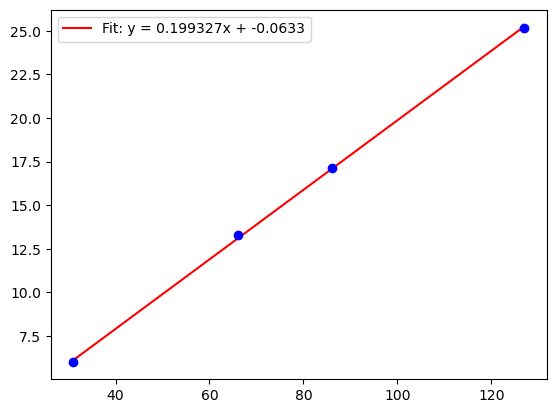

In [85]:
y = [610, 1353, 1745, 2565]
y = [i * 9.81 / 1000 for i in y]  # Convert to N
x = [31, 66, 86, 127]

coeffs = np.polyfit(x, y, 1)
linear_fit = np.poly1d(coeffs)
y_fit = linear_fit(x)
plt.plot(x, y_fit, label=f'Fit: y = {coeffs[0]:.6f}x + {coeffs[1]:.4f}', color='red')
plt.legend()
print(f"Linear function: y = {coeffs[0]:.6f}x + {coeffs[1]:.4f}")


plt.plot(x, y, marker='o', linestyle='None', color='blue')
plt.show()